In [1]:
# import sys
# from google import genai 
# from google.genai import types 

# PROJECT_ID = 'zen-general-377713'
# LOCATION = 'us-central1'
# MODEL_NAME = "gemini-1.5-flash-001"

# client  = genai.Client(vertexai=True,project=PROJECT_ID, location=LOCATION)
# response = client.models.generate_content(model=MODEL_NAME, contents= "hi")
# response.text 

In [14]:
import os
from langchain_google_vertexai import ChatVertexAI
from langchain_core.pydantic_v1 import BaseModel, Field
from google.oauth2 import service_account

key_path = "jupyter_notebook_ai_clone/config/zen-general-377713-13db13cf4b80.json"

credentials = service_account.Credentials.from_service_account_file(
    key_path,
    scopes=["https://www.googleapis.com/auth/cloud-platform"]
)

os.environ["GOOGLE_APPLICATION_CREDENTIALS"] = key_path

PROJECT_ID = 'zen-general-377713'
LOCATION = 'us-central1'
MODEL_NAME = "gemini-2.0-flash-001"

chat_model = ChatVertexAI(
    project_id=PROJECT_ID,
    location=LOCATION,
    model_name=MODEL_NAME,
    credentials=credentials
)

# response = chat_model.invoke("hi")
# print(response)
# content='Hi there! 👋  How can I help you today? 😊 \n' additional_kwargs={} response_metadata={'is_blocked': False, 'safety_ratings': [{'category': 'HARM_CATEGORY_HATE_SPEECH', 'probability_label': 'NEGLIGIBLE', 'probability_score': 0.02978515625, 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE', 'severity_score': 0.0302734375}, {'category': 'HARM_CATEGORY_DANGEROUS_CONTENT', 'probability_label': 'NEGLIGIBLE', 'probability_score': 0.049560546875, 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE', 'severity_score': 0.048095703125}, {'category': 'HARM_CATEGORY_HARASSMENT', 'probability_label': 'NEGLIGIBLE', 'probability_score': 0.04345703125, 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE', 'severity_score': 0.0169677734375}, {'category': 'HARM_CATEGORY_SEXUALLY_EXPLICIT', 'probability_label': 'NEGLIGIBLE', 'probability_score': 0.140625, 'blocked': False, 'severity': 'HARM_SEVERITY_NEGLIGIBLE', 'severity_score': 0.023681640625}], 'usage_metadata': {'prompt_token_count': 1, 'candidates_token_count': 15, 'total_token_count': 16, 'prompt_tokens_details': [{'modality': 1, 'token_count': 1}], 'candidates_tokens_details': [{'modality': 1, 'token_count': 15}], 'cached_content_token_count': 0, 'cache_tokens_details': []}, 'finish_reason': 'STOP', 'avg_logprobs': -0.13779719670613608, 'model_name': 'gemini-1.5-flash-001'} id='run-8fe37d83-fb90-47bc-9790-b54dfe53fed8-0' usage_metadata={'input_tokens': 1, 'output_tokens': 15, 'total_tokens': 16}


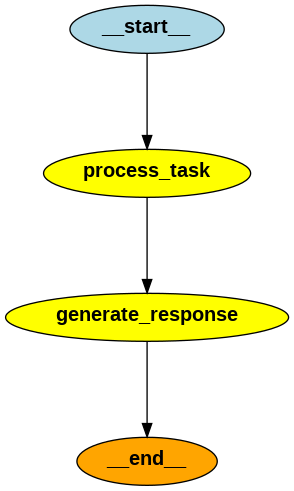

Graph visualization displayed successfully!
Response: Okay, here's a simple explanation of LangGraph:

Imagine you have a complex task you want an AI to perform, like creating a chatbot that can handle customer support, write marketing copy, or even play a game.

LangGraph is a tool that helps you structure this complex task into a **series of steps or "nodes" that an AI (usually a large language model like GPT-4) can follow**. Think of it like a flowchart for your AI.

Here's the breakdown:

*   **Nodes:** Each node represents a specific action or decision. For example:
    *   **Get User Input:** A node that asks the user for their question or request.
    *   **Decide Next Step:** A node that uses the AI to determine what to do next (e.g., search a database, answer directly, escalate to a human).
    *   **Search Knowledge Base:** A node that retrieves relevant information from a database.
    *   **Generate Response:** A node that uses the AI to create a response based on the infor

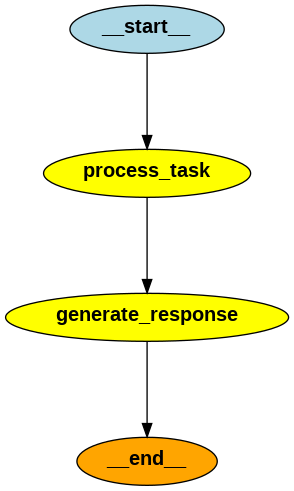

In [7]:
from typing import TypedDict, Annotated, List
from langgraph.graph import StateGraph
from langchain_core.messages import HumanMessage, AIMessage
from IPython.display import Image, display

# Define the state for our graph
class State(TypedDict):
    messages: Annotated[List, "The conversation history"]
    task: str

# Define our nodes (functions that will operate on the state)
def generate_response(state: State) -> State:
    """Use the Gemini model to generate a response based on conversation history"""
    # Extract the messages from the state
    messages = state["messages"]
    
    # Call the model
    response = chat_model.invoke(messages)
    
    # Add the AI's response to the message history
    state["messages"].append(AIMessage(content=response.content))
    
    # Return the updated state
    return state

def process_task(state: State) -> State:
    """Process the user's task and prepare it for the AI"""
    task = state["task"]
    
    # Add some custom instructions or context based on the task
    enhanced_prompt = f"The user wants to: {task}. Please provide a helpful response."
    
    # Add the enhanced prompt to messages
    state["messages"].append(HumanMessage(content=enhanced_prompt))
    
    return state

# Create the graph
workflow = StateGraph(State)

# Add nodes to the graph
workflow.add_node("process_task", process_task)
workflow.add_node("generate_response", generate_response)

# Add edges to define the flow
workflow.add_edge("process_task", "generate_response")
workflow.set_entry_point("process_task")
workflow.set_finish_point("generate_response")

# Compile the graph
app = workflow.compile()

# Function to run the graph
def run_conversation(user_task: str, visualize=False, output_image_path=None):
    # Initialize the state
    initial_state = {
        "messages": [],
        "task": user_task
    }
    
    # Run the graph
    result = app.invoke(initial_state)
    
    # Generate and display visualization if requested
    if visualize:
        try:
            # Generate and display graph with Graphviz
            png_data = app.get_graph().draw_png(output_image_path)
            display(Image(png_data))
            print("Graph visualization displayed successfully!")
        except Exception as e:
            print(f"Error visualizing workflow: {e}")
            print("Workflow: process_task → generate_response")
    
    # Return the final response
    return result["messages"][-1].content

# Example usage
if __name__ == "__main__":
    user_task = "Explain what LangGraph is in simple terms"
    response = run_conversation(user_task, visualize=True)
    print(f"Response: {response}")
    
    # Alternative direct visualization
    try:
        display(Image(app.get_graph().draw_png()))
    except Exception as e:
        print(f"Error with direct visualization: {e}")

## Langgraph Weather

In [16]:
# Import necessary libraries
import os
import json
import requests
from typing import Annotated, List, TypedDict, Dict, Any
import operator
import pgeocode
import pandas as pd
from langchain_google_vertexai import ChatVertexAI
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, ToolMessage, AnyMessage
from langchain_core.tools import tool, BaseTool
from langchain_core.prompts import MessagesPlaceholder, ChatPromptTemplate
from langchain_core.runnables import RunnableConfig
from IPython.display import Image, display

# LangGraph imports
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition

# Define your structured output schema with Pydantic
class Lane(BaseModel):
    origin_zip: str = Field(description="The origin ZIP code")
    dest_zip: str = Field(description="The destination ZIP code")
    origin_location: str = Field(description="The origin city and state")
    dest_location: str = Field(description="The destination city and state")
    origin_weather_risk: int = Field(description="Weather risk at origin on scale 1-10 (10 being severe)")
    dest_weather_risk: int = Field(description="Weather risk at destination on scale 1-10 (10 being severe)")
    origin_weather_forecast: str = Field(description="Weather forecast for the origin location")
    dest_weather_forecast: str = Field(description="Weather forecast for the destination location")
    service_risk: bool = Field(description="True if there is a significant service risk due to weather conditions")
    explanation: str = Field(description="Brief explanation of the risk assessment")

# Initialize the chat model
chat_model = ChatVertexAI(
    model_name="gemini-1.5-pro",  # or your preferred model
    temperature=0,
    max_output_tokens=1024
)

# Initialize pgeocode for ZIP code to lat/lon conversion
nomi = pgeocode.Nominatim('us')  # For US postal codes

@tool
def get_coordinates_from_zip(zip_code: str) -> Dict[str, Any]:
    """
    Convert a ZIP code to latitude and longitude coordinates.
    
    Args:
        zip_code (str): The ZIP code to convert
        
    Returns:
        dict: Dictionary containing latitude and longitude
    """
    try:
        postal_data = nomi.query_postal_code(zip_code)
        
        # Check if postal_data contains valid information
        if not pd.isna(postal_data.latitude) and not pd.isna(postal_data.longitude):
            return {
                "latitude": float(postal_data.latitude),
                "longitude": float(postal_data.longitude),
                "place_name": str(postal_data.place_name),
                "state": str(postal_data.state_name) if not pd.isna(postal_data.state_name) else "Unknown",
                "county": str(postal_data.county_name) if not pd.isna(postal_data.county_name) else "Unknown"
            }
        else:
            # If ZIP code is found but coordinates are NaN, return fallback values
            return {
                "error": f"Invalid coordinate data for ZIP code: {zip_code}"
            }
    except Exception as e:
        return {"error": f"Error retrieving coordinates: {str(e)}"}

@tool
def get_weather_forecast(latitude: float, longitude: float) -> Dict[str, Any]:
    """
    Get weather forecast from the National Weather Service API.
    
    Args:
        latitude (float): Latitude coordinate
        longitude (float): Longitude coordinate
        
    Returns:
        dict: Weather forecast information
    """
    try:
        # First, get the grid endpoint for the location
        points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
        points_response = requests.get(points_url, headers={"User-Agent": "ShippingWeatherRiskAgent/1.0"})
        points_data = points_response.json()
        
        # Get the forecast URL from the points response
        forecast_url = points_data["properties"]["forecast"]
        
        # Get the forecast data
        forecast_response = requests.get(forecast_url, headers={"User-Agent": "ShippingWeatherRiskAgent/1.0"})
        forecast_data = forecast_response.json()
        
        # Extract relevant forecast information for the first period (current day)
        current_forecast = forecast_data["properties"]["periods"][0]
        
        return {
            "location": points_data["properties"]["relativeLocation"]["properties"]["city"],
            "state": points_data["properties"]["relativeLocation"]["properties"]["state"],
            "name": current_forecast["name"],
            "detailed_forecast": current_forecast["detailedForecast"],
            "temperature": current_forecast["temperature"],
            "temperature_unit": current_forecast["temperatureUnit"],
            "wind_speed": current_forecast["windSpeed"],
            "wind_direction": current_forecast["windDirection"]
        }
    except Exception as e:
        return {"error": f"Error retrieving weather forecast: {str(e)}"}

@tool
def assess_weather_risk(weather_data: Dict[str, Any]) -> Dict[str, Any]:
    """
    Assess the weather risk on a scale of 1-10 based on the weather data.
    
    Args:
        weather_data (dict): Weather forecast information
        
    Returns:
        dict: Risk assessment information
    """
    try:
        # Check if there was an error retrieving the forecast
        if "error" in weather_data:
            return {"risk_score": 5, "reason": "Unable to assess risk accurately due to forecast retrieval error"}
        
        detailed_forecast = weather_data.get("detailed_forecast", "").lower()
        temperature = weather_data.get("temperature", 70)
        wind_speed = weather_data.get("wind_speed", "0 mph")
        
        # Extract wind speed value
        try:
            wind_speed_value = int(wind_speed.split(" ")[0])
        except:
            wind_speed_value = 0
        
        # Initialize risk score
        risk_score = 1  # Default to low risk
        
        # Check for severe weather conditions
        severe_weather_terms = ["hurricane", "tornado", "severe thunderstorm", "blizzard", "ice storm", 
                                "flood", "flash flood", "warning", "emergency", "evacuate"]
        
        moderate_weather_terms = ["thunderstorm", "snow", "freezing rain", "heavy rain", "fog", 
                                 "high wind", "advisory", "watch"]
        
        minor_weather_terms = ["rain", "drizzle", "light snow", "cloudy", "overcast"]
        
        # Check for severe conditions
        for term in severe_weather_terms:
            if term in detailed_forecast:
                risk_score = max(risk_score, 8)  # Set minimum risk to 8 if severe condition found
        
        # Check for moderate conditions
        for term in moderate_weather_terms:
            if term in detailed_forecast:
                risk_score = max(risk_score, 5)  # Set minimum risk to 5 if moderate condition found
        
        # Check for minor conditions
        for term in minor_weather_terms:
            if term in detailed_forecast:
                risk_score = max(risk_score, 2)  # Set minimum risk to 2 if minor condition found
        
        # Adjust for extreme temperatures
        if temperature > 100:
            risk_score = max(risk_score, 7)  # High heat risk
        elif temperature > 90:
            risk_score = max(risk_score, 4)  # Moderate heat risk
        elif temperature < 0:
            risk_score = max(risk_score, 8)  # Severe cold risk
        elif temperature < 20:
            risk_score = max(risk_score, 6)  # Moderate cold risk
        
        # Adjust for high winds
        if wind_speed_value > 40:
            risk_score = max(risk_score, 8)  # High wind risk
        elif wind_speed_value > 25:
            risk_score = max(risk_score, 5)  # Moderate wind risk
        
        # Determine reason for the risk assessment
        if risk_score >= 8:
            reason = "Severe weather conditions present significant transportation risks"
        elif risk_score >= 5:
            reason = "Moderate weather conditions may affect transportation"
        elif risk_score >= 2:
            reason = "Minor weather conditions present minimal transportation risks"
        else:
            reason = "Ideal weather conditions for transportation"
        
        return {
            "risk_score": risk_score,
            "reason": reason,
            "forecast_summary": weather_data.get("detailed_forecast", "No forecast available")
        }
    except Exception as e:
        return {"risk_score": 5, "reason": f"Error in risk assessment: {str(e)}"}

@tool
def get_shipping_lane_risk(origin_zip: str, dest_zip: str) -> Dict[str, Any]:
    """
    Assess the weather-related risks for shipping between two ZIP codes.
    
    Args:
        origin_zip (str): The origin ZIP code
        dest_zip (str): The destination ZIP code
        
    Returns:
        dict: Complete risk assessment for the shipping lane, including weather forecasts
    """
    try:
        # Initialize location fallbacks in case of errors
        origin_location = f"{origin_zip} (no location data available)"
        dest_location = f"{dest_zip} (no location data available)"
        origin_forecast = "No forecast available"
        dest_forecast = "No forecast available"
        origin_risk_score = 5  # Default moderate risk
        dest_risk_score = 5  # Default moderate risk
        origin_risk_reason = "Unable to assess accurately due to data limitations"
        dest_risk_reason = "Unable to assess accurately due to data limitations"
        
        # Get coordinates for origin
        origin_coords = get_coordinates_from_zip(origin_zip)
        if "error" in origin_coords:
            print(f"Origin ZIP code error: {origin_coords['error']}")
        
        # Get coordinates for destination
        dest_coords = get_coordinates_from_zip(dest_zip)
        if "error" in dest_coords:
            print(f"Destination ZIP code error: {dest_coords['error']}")
        
        # Get weather for origin if coordinates are available
        if "latitude" in origin_coords and "longitude" in origin_coords:
            try:
                # Direct function call instead of tool invocation
                origin_weather = get_weather_forecast(
                    origin_coords["latitude"], 
                    origin_coords["longitude"]
                )
                if "error" not in origin_weather:
                    origin_forecast = origin_weather.get("detailed_forecast", origin_forecast)
                    # Assess origin risk
                    origin_risk = assess_weather_risk(origin_weather)
                    origin_risk_score = origin_risk.get("risk_score", origin_risk_score)
                    origin_risk_reason = origin_risk.get("reason", origin_risk_reason)
            except Exception as e:
                print(f"Error getting origin weather: {str(e)}")
        
        # Get weather for destination if coordinates are available
        if "latitude" in dest_coords and "longitude" in dest_coords:
            try:
                # Direct function call instead of tool invocation
                dest_weather = get_weather_forecast(
                    dest_coords["latitude"], 
                    dest_coords["longitude"]
                )
                if "error" not in dest_weather:
                    dest_forecast = dest_weather.get("detailed_forecast", dest_forecast)
                    # Assess destination risk
                    dest_risk = assess_weather_risk(dest_weather)
                    dest_risk_score = dest_risk.get("risk_score", dest_risk_score)
                    dest_risk_reason = dest_risk.get("reason", dest_risk_reason)
            except Exception as e:
                print(f"Error getting destination weather: {str(e)}")
        
        # Prepare location strings with fallbacks
        if "place_name" in origin_coords and "state" in origin_coords:
            origin_location = f"{origin_coords.get('place_name', 'Unknown')}, {origin_coords.get('state', 'Unknown')}"
        
        if "place_name" in dest_coords and "state" in dest_coords:
            dest_location = f"{dest_coords.get('place_name', 'Unknown')}, {dest_coords.get('state', 'Unknown')}"
        
        # Return all available information - LLM will determine service risk
        return {
            "origin": {
                "zip": origin_zip,
                "place": origin_coords.get("place_name", "Unknown"),
                "state": origin_coords.get("state", "Unknown"),
                "county": origin_coords.get("county", "Unknown"),
                "weather": origin_forecast,
                "risk_score": origin_risk_score,
                "risk_reason": origin_risk_reason
            },
            "destination": {
                "zip": dest_zip,
                "place": dest_coords.get("place_name", "Unknown"),
                "state": dest_coords.get("state", "Unknown"),
                "county": dest_coords.get("county", "Unknown"),
                "weather": dest_forecast,
                "risk_score": dest_risk_score,
                "risk_reason": dest_risk_reason
            },
            "origin_location": origin_location,
            "dest_location": dest_location,
            "origin_weather_forecast": origin_forecast,
            "dest_weather_forecast": dest_forecast
        }
    except Exception as e:
        print(f"Error in shipping lane risk assessment: {str(e)}")
        return {
            "error": f"Error in shipping lane risk assessment: {str(e)}",
            "origin_location": f"{origin_zip} (error occurred)",
            "dest_location": f"{dest_zip} (error occurred)",
            "origin_zip": origin_zip,
            "dest_zip": dest_zip,
            "origin_weather_forecast": "No forecast available due to error",
            "dest_weather_forecast": "No forecast available due to error"
        }

# Create a list of tools to use in the agent
tools = [get_coordinates_from_zip, get_weather_forecast, assess_weather_risk, get_shipping_lane_risk]

# Define the state for LangGraph
class State(TypedDict):
    messages: Annotated[List[AnyMessage], add_messages]

# System prompt for the agent
system_prompt = """You are a shipping logistics assistant that helps determine weather-related risks for shipments.

Your task is to:
1. Identify origin and destination ZIP codes from user queries
2. Use tools to check current weather conditions at both locations
3. Assess the weather risk at each location on a scale of 1-10 (10 being severe)
4. Determine if there is an overall service risk based on the following factors:
   - The weather risk score at each location
   - The geographic regions involved (consider regional weather patterns)
   - The specific weather forecasts for each location
   - The distance between locations (longer routes may encounter more varied conditions)
   - Any seasonal factors that might impact shipping
   - Any specific terrain or geographical features that might increase risk

When determining service risk, consider:
- A location with a risk score ≥ 7 typically indicates a HIGH service risk
- Combined risk scores ≥ 12 often indicate a HIGH service risk
- The specific locations may impact your judgment (e.g., mountainous regions might have higher risk even with moderate scores)
- Weather patterns that could affect interconnecting routes between locations
- Urban vs. rural locations and their typical infrastructure readiness

When assessing weather risk, consider:
- Severe weather (hurricanes, blizzards, floods) = 8-10
- Moderate weather issues (heavy rain, snow, fog) = 5-7
- Minor weather issues (light rain, cloudy) = 2-4
- Good weather (clear, sunny) = 1

For your final response, use this format:
```
Final Assessment:
origin_zip: [ZIP code]
dest_zip: [ZIP code]
origin_location: [City, State]
dest_location: [City, State]
origin_weather_forecast: [Full weather forecast for origin]
dest_weather_forecast: [Full weather forecast for destination]
origin_weather_risk: [1-10]
dest_weather_risk: [1-10]
service_risk: [True/False]
explanation: [Brief explanation of risk assessment]
```

Always explain your risk assessment reasoning.
Include the actual weather forecasts in your response.
Make the final service_risk determination based on your expertise, not on rigid rules.
"""

# Create structured model with tools
llm_with_tools = chat_model.bind_tools(tools)
structured_llm = chat_model.with_structured_output(Lane)

# Helper function to determine if we have a final assessment
def is_final_assessment(state: State) -> bool:
    """Determine if the message appears to be a final assessment ready for structuring."""
    messages = state["messages"]
    last_message = messages[-1] if messages else None
    
    if last_message and isinstance(last_message, AIMessage):
        content = last_message.content
        # Check if the message appears to be a final assessment
        return isinstance(content, str) and "Final Assessment:" in content
    return False

# Agent node function
def agent(state: State):
    """Process the current state and decide on the next action."""
    messages = state["messages"]
    
    # Add system message if it's not already there
    if not any(isinstance(msg, SystemMessage) for msg in messages):
        messages = [SystemMessage(content=system_prompt)] + messages
    
    # Use tool-enabled LLM for message processing
    response = llm_with_tools.invoke(messages)
    
    return {"messages": [response]}

# Format response node for structured output
def format_response(state: State):
    """Format the final response as a structured Lane object."""
    messages = state["messages"]
    
    try:
        # Extract structured data directly using the LLM's structured output capability
        structured_output = structured_llm.invoke(messages)
        
        # Format a nice response that includes both the structured data and explanation
        formatted_message = AIMessage(content=f"""
Here's my assessment of the shipping lane:

Origin: {structured_output.origin_location} (ZIP: {structured_output.origin_zip})
Destination: {structured_output.dest_location} (ZIP: {structured_output.dest_zip})

Weather Forecast (Origin): {structured_output.origin_weather_forecast}
Weather Forecast (Destination): {structured_output.dest_weather_forecast}

Origin Weather Risk: {structured_output.origin_weather_risk}/10
Destination Weather Risk: {structured_output.dest_weather_risk}/10
Service Risk: {"High" if structured_output.service_risk else "Low"}

{structured_output.explanation}
        """)
        
        return {"messages": messages + [formatted_message]}
    except Exception as e:
        print(f"Error structuring output: {str(e)}")
        # Fall back to the original response if structuring fails
        return {"messages": messages}
    
# Create the weather risk graph
def create_weather_risk_graph():
    """Create a weather risk assessment graph optimized for single-use per lane."""
    # Create a new graph builder
    graph_builder = StateGraph(State)
    
    # Add all nodes
    graph_builder.add_node("agent", agent)
    graph_builder.add_node("tools", ToolNode(tools=tools))
    graph_builder.add_node("format_response", format_response)
    
    # Add edges
    graph_builder.add_edge(START, "agent")
    
    # Simplified routing function
    def route_message(state: State) -> str:
        """Route the message to the appropriate node."""
        if is_final_assessment(state):
            return "format_response"
        
        # Use the standard tools_condition logic for tool routing
        tool_route = tools_condition(state)
        
        # Handle __end__ correctly
        if tool_route == "__end__":
            return "agent"  # Changed from "end" to "agent" to continue processing
        
        return tool_route
    
    # Conditional edges with proper mappings
    graph_builder.add_conditional_edges(
        "agent",
        route_message,
        {
            "tools": "tools",
            "agent": "agent",  # Loop back to agent if not ready to end
            "format_response": "format_response"
        }
    )
    
    # Complete the rest of the graph
    graph_builder.add_edge("tools", "agent")
    graph_builder.add_edge("format_response", END)
    
    # Compile the graph WITHOUT checkpointing
    graph = graph_builder.compile()
    
    return graph

# Function to assess shipping lane weather risks - simplified for single use
def assess_shipping_lane(origin_zip, dest_zip, visualize=False):
    """
    Assess weather risks for a specific shipping lane defined by origin and destination ZIP codes.
    
    Args:
        origin_zip (str): The origin ZIP code
        dest_zip (str): The destination ZIP code
        visualize (bool): Whether to generate and display a visualization of the graph
    
    Returns:
        dict: The agent's risk assessment and structured lane data
    """
    # Create a fresh graph for each assessment
    graph = create_weather_risk_graph()
    
    # Create the input message with ZIP codes directly
    human_message = HumanMessage(
        content=f"I need to assess the weather risks for shipping from ZIP code {origin_zip} to ZIP code {dest_zip}."
    )
    
    try:
        # Generate and display visualization if requested
        if visualize:
            try:
                # Generate and display graph with Graphviz
                display(Image(graph.get_graph().draw_mermaid_png()))
                print("Graph visualization displayed successfully!")
            except Exception as e:
                print(f"Error visualizing workflow: {e}")
        
        # Invoke the graph with the message
        result = graph.invoke({"messages": [human_message]})
        
        # Get the final AI message
        response = result["messages"][-1]
        
        # Extract structured data
        lane_info = extract_lane_info(response)
        
        return {
            "response": response.content,
            "lane_info": lane_info
        }
    except Exception as e:
        print(f"Error in assess_shipping_lane: {str(e)}")
        return {
            "response": f"Error assessing shipping lane: {str(e)}",
            "lane_info": None
        }

# Extract Lane information from response
def extract_lane_info(response):
    """Extract structured Lane information from the agent's response."""
    try:
        # If response is already a Lane object, return it directly
        if hasattr(response, "content") and isinstance(response.content, Lane):
            return response.content
            
        # Use structured output capability to parse the response text
        if hasattr(response, "content"):
            return structured_llm.invoke([SystemMessage(content="Extract the Lane information from this response:"), 
                                         HumanMessage(content=response.content)])
        
        # Fall back if needed
        return None
    except Exception as e:
        print(f"Error extracting Lane info: {str(e)}")
        return None

# Improved direct access function for testing
def direct_weather_assessment(origin_zip, dest_zip):
    """
    Directly assess weather risks without using the LangGraph framework.
    This function can be used for testing or as a fallback.
    """
    print(f"\nDirect assessment for {origin_zip} → {dest_zip}")
    
    try:
        # Get origin coordinates
        origin_coords = get_coordinates_from_zip(origin_zip)
        print(f"Origin coordinates: {origin_coords}")
        
        # Get destination coordinates
        dest_coords = get_coordinates_from_zip(dest_zip)
        print(f"Destination coordinates: {dest_coords}")
        
        # Get weather forecasts
        origin_weather = None
        dest_weather = None
        
        if "latitude" in origin_coords and "longitude" in origin_coords:
            origin_weather = get_weather_forecast(origin_coords["latitude"], origin_coords["longitude"])
            print(f"Origin weather: {origin_weather.get('detailed_forecast', 'Not available')}")
        
        if "latitude" in dest_coords and "longitude" in dest_coords:
            dest_weather = get_weather_forecast(dest_coords["latitude"], dest_coords["longitude"])
            print(f"Destination weather: {dest_weather.get('detailed_forecast', 'Not available')}")
        
        # Assess risks
        origin_risk = assess_weather_risk(origin_weather if origin_weather else {})
        dest_risk = assess_weather_risk(dest_weather if dest_weather else {})
        
        print(f"Origin risk: {origin_risk.get('risk_score', 'Not available')}/10")
        print(f"Destination risk: {dest_risk.get('risk_score', 'Not available')}/10")
        
        return {
            "origin_coords": origin_coords,
            "dest_coords": dest_coords,
            "origin_weather": origin_weather,
            "dest_weather": dest_weather,
            "origin_risk": origin_risk,
            "dest_risk": dest_risk
        }
    except Exception as e:
        print(f"Error in direct weather assessment: {str(e)}")
        return {"error": str(e)}

# Example usage
if __name__ == "__main__":
    # Test with the direct access function first
    origin_zip = "56001"  # Mankato, MN
    dest_zip = "55328"    # Delano, MN
    
    print(f"Testing with ZIP codes: {origin_zip} → {dest_zip}")
    
    # First, run the direct assessment to test individual functions
    try:
        direct_result = direct_weather_assessment(origin_zip, dest_zip)
        if "error" not in direct_result:
            print("\nDirect assessment successful!")
        else:
            print(f"\nDirect assessment failed: {direct_result['error']}")
    except Exception as e:
        print(f"\nError during direct assessment: {str(e)}")
    
    # Then run the full LangGraph assessment
    try:
        print("\nRunning full LangGraph assessment...")
        result = assess_shipping_lane(origin_zip, dest_zip, visualize=True)
        
        print(f"\nWeather Risk Assessment for {origin_zip} to {dest_zip}:")
        if "response" in result:
            print(result["response"])
        else:
            print("No response generated")
        
        # Print structured lane information if available
        if result.get("lane_info"):
            lane = result["lane_info"]
            print("\nStructured Lane Information:")
            try:
                print(f"Origin: {lane.origin_location} (ZIP: {lane.origin_zip})")
                print(f"Destination: {lane.dest_location} (ZIP: {lane.dest_zip})")
                print(f"Origin Weather Risk: {lane.origin_weather_risk}/10")
                print(f"Destination Weather Risk: {lane.dest_weather_risk}/10")
                print(f"Service Risk: {lane.service_risk}")
                print(f"Explanation: {lane.explanation}")
            except Exception as e:
                print(f"Error displaying lane info: {str(e)}")
                print(f"Raw lane info: {lane}")
        else:
            print("\nNo structured lane information available")
    except Exception as e:
        print(f"\nError running full assessment: {str(e)}")

Testing with ZIP codes: 56001 → 55328

Direct assessment for 56001 → 55328
Origin coordinates: {'latitude': 44.1538, 'longitude': -93.996, 'place_name': 'Mankato', 'state': 'Minnesota', 'county': 'Blue Earth'}
Destination coordinates: {'latitude': 45.0342, 'longitude': -93.8016, 'place_name': 'Delano', 'state': 'Minnesota', 'county': 'Wright'}
Error in direct weather assessment: 'float' object has no attribute 'parent_run_id'

Direct assessment failed: 'float' object has no attribute 'parent_run_id'

Running full LangGraph assessment...
Error visualizing workflow: HTTPSConnectionPool(host='mermaid.ink', port=443): Read timed out. (read timeout=10)
Error getting origin weather: 'float' object has no attribute 'parent_run_id'
Error getting destination weather: 'float' object has no attribute 'parent_run_id'

Weather Risk Assessment for 56001 to 55328:

Here's my assessment of the shipping lane:

Origin: Mankato, Minnesota (ZIP: 56001)
Destination: Delano, Minnesota (ZIP: 55328)

Weather 

In [ ]:
# Import necessary libraries
import os
import json
import requests
from typing import Annotated, List, TypedDict, Dict, Any
import operator
import pgeocode
from langchain_google_vertexai import ChatVertexAI
from langchain_core.pydantic_v1 import BaseModel, Field
from langchain_core.messages import HumanMessage, AIMessage, SystemMessage, ToolMessage, AnyMessage
from langchain_core.tools import tool, BaseTool
from langchain_core.prompts import MessagesPlaceholder, ChatPromptTemplate
from langchain_core.runnables import RunnableConfig

# LangGraph imports
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition
from langgraph.checkpoint.memory import MemorySaver
from IPython.display import Image, display

# Define your structured output schema with Pydantic
class Lane(BaseModel):
    origin_zip: str = Field(description="The origin ZIP code")
    dest_zip: str = Field(description="The destination ZIP code")
    origin_weather_risk: int = Field(description="Weather risk at origin on scale 1-10 (10 being severe)")
    dest_weather_risk: int = Field(description="Weather risk at destination on scale 1-10 (10 being severe)")
    origin_weather_forecast: str = Field(description="Weather forecast for the origin location")
    dest_weather_forecast: str = Field(description="Weather forecast for the destination location")
    service_risk: bool = Field(description="True if there is a significant service risk due to weather conditions")
    explanation: str = Field(description="Brief explanation of the risk assessment")

# Initialize pgeocode for ZIP code to lat/lon conversion
nomi = pgeocode.Nominatim('us')  # For US postal codes

@tool
def get_coordinates_from_zip(zip_code: str) -> Dict[str, Any]:
    """
    Convert a ZIP code to latitude and longitude coordinates.
    
    Args:
        zip_code (str): The ZIP code to convert
        
    Returns:
        dict: Dictionary containing latitude and longitude
    """
    try:
        postal_data = nomi.query_postal_code(zip_code)
        return {
            "latitude": float(postal_data.latitude),
            "longitude": float(postal_data.longitude),
            "place_name": postal_data.place_name
        }
    except Exception as e:
        return {"error": f"Error retrieving coordinates: {str(e)}"}

@tool
def get_weather_forecast(latitude: float, longitude: float) -> Dict[str, Any]:
    """
    Get weather forecast from the National Weather Service API.
    
    Args:
        latitude (float): Latitude coordinate
        longitude (float): Longitude coordinate
        
    Returns:
        dict: Weather forecast information
    """
    try:
        # First, get the grid endpoint for the location
        points_url = f"https://api.weather.gov/points/{latitude},{longitude}"
        points_response = requests.get(points_url, headers={"User-Agent": "ShippingWeatherRiskAgent/1.0"})
        points_data = points_response.json()
        
        # Get the forecast URL from the points response
        forecast_url = points_data["properties"]["forecast"]
        
        # Get the forecast data
        forecast_response = requests.get(forecast_url, headers={"User-Agent": "ShippingWeatherRiskAgent/1.0"})
        forecast_data = forecast_response.json()
        
        # Extract relevant forecast information for the first period (current day)
        current_forecast = forecast_data["properties"]["periods"][0]
        
        return {
            "location": points_data["properties"]["relativeLocation"]["properties"]["city"],
            "state": points_data["properties"]["relativeLocation"]["properties"]["state"],
            "name": current_forecast["name"],
            "detailed_forecast": current_forecast["detailedForecast"],
            "temperature": current_forecast["temperature"],
            "temperature_unit": current_forecast["temperatureUnit"],
            "wind_speed": current_forecast["windSpeed"],
            "wind_direction": current_forecast["windDirection"]
        }
    except Exception as e:
        return {"error": f"Error retrieving weather forecast: {str(e)}"}

@tool
def assess_weather_risk(weather_data: Dict[str, Any]) -> Dict[str, Any]:
    """
    Assess the weather risk on a scale of 1-10 based on the weather data.
    
    Args:
        weather_data (dict): Weather forecast information
        
    Returns:
        dict: Risk assessment information
    """
    try:
        # Check if there was an error retrieving the forecast
        if "error" in weather_data:
            return {"risk_score": 5, "reason": "Unable to assess risk accurately due to forecast retrieval error"}
        
        detailed_forecast = weather_data.get("detailed_forecast", "").lower()
        temperature = weather_data.get("temperature", 70)
        wind_speed = weather_data.get("wind_speed", "0 mph")
        
        # Extract wind speed value
        try:
            wind_speed_value = int(wind_speed.split(" ")[0])
        except:
            wind_speed_value = 0
        
        # Initialize risk score
        risk_score = 1  # Default to low risk
        
        # Check for severe weather conditions
        severe_weather_terms = ["hurricane", "tornado", "severe thunderstorm", "blizzard", "ice storm", 
                                "flood", "flash flood", "warning", "emergency", "evacuate"]
        
        moderate_weather_terms = ["thunderstorm", "snow", "freezing rain", "heavy rain", "fog", 
                                 "high wind", "advisory", "watch"]
        
        minor_weather_terms = ["rain", "drizzle", "light snow", "cloudy", "overcast"]
        
        # Check for severe conditions
        for term in severe_weather_terms:
            if term in detailed_forecast:
                risk_score = max(risk_score, 8)  # Set minimum risk to 8 if severe condition found
        
        # Check for moderate conditions
        for term in moderate_weather_terms:
            if term in detailed_forecast:
                risk_score = max(risk_score, 5)  # Set minimum risk to 5 if moderate condition found
        
        # Check for minor conditions
        for term in minor_weather_terms:
            if term in detailed_forecast:
                risk_score = max(risk_score, 2)  # Set minimum risk to 2 if minor condition found
        
        # Adjust for extreme temperatures
        if temperature > 100:
            risk_score = max(risk_score, 7)  # High heat risk
        elif temperature > 90:
            risk_score = max(risk_score, 4)  # Moderate heat risk
        elif temperature < 0:
            risk_score = max(risk_score, 8)  # Severe cold risk
        elif temperature < 20:
            risk_score = max(risk_score, 6)  # Moderate cold risk
        
        # Adjust for high winds
        if wind_speed_value > 40:
            risk_score = max(risk_score, 8)  # High wind risk
        elif wind_speed_value > 25:
            risk_score = max(risk_score, 5)  # Moderate wind risk
        
        # Determine reason for the risk assessment
        if risk_score >= 8:
            reason = "Severe weather conditions present significant transportation risks"
        elif risk_score >= 5:
            reason = "Moderate weather conditions may affect transportation"
        elif risk_score >= 2:
            reason = "Minor weather conditions present minimal transportation risks"
        else:
            reason = "Ideal weather conditions for transportation"
        
        return {
            "risk_score": risk_score,
            "reason": reason,
            "forecast_summary": weather_data.get("detailed_forecast", "No forecast available")
        }
    except Exception as e:
        return {"risk_score": 5, "reason": f"Error in risk assessment: {str(e)}"}

@tool
def get_shipping_lane_risk(origin_zip: str, dest_zip: str) -> Dict[str, Any]:
    """
    Assess the weather-related risks for shipping between two ZIP codes.
    
    Args:
        origin_zip (str): The origin ZIP code
        dest_zip (str): The destination ZIP code
        
    Returns:
        dict: Complete risk assessment for the shipping lane, including weather forecasts
    """
    try:
        # Get coordinates for origin
        origin_coords = get_coordinates_from_zip(origin_zip)
        if "error" in origin_coords:
            return {"error": f"Origin ZIP code error: {origin_coords['error']}"}
        
        # Get coordinates for destination
        dest_coords = get_coordinates_from_zip(dest_zip)
        if "error" in dest_coords:
            return {"error": f"Destination ZIP code error: {dest_coords['error']}"}
        
        # Get weather for origin
        origin_weather = get_weather_forecast(origin_coords["latitude"], origin_coords["longitude"])
        
        # Get weather for destination
        dest_weather = get_weather_forecast(dest_coords["latitude"], dest_coords["longitude"])
        
        # Assess risks
        origin_risk = assess_weather_risk(origin_weather)
        dest_risk = assess_weather_risk(dest_weather)
        
        # Determine overall service risk
        origin_risk_score = origin_risk["risk_score"]
        dest_risk_score = dest_risk["risk_score"]
        service_risk = (origin_risk_score >= 7 or dest_risk_score >= 7 or 
                       (origin_risk_score + dest_risk_score) >= 12)
        
        # Save the detailed weather forecasts
        origin_forecast = origin_weather.get("detailed_forecast", "No forecast available")
        dest_forecast = dest_weather.get("detailed_forecast", "No forecast available")
        
        return {
            "origin": {
                "zip": origin_zip,
                "place": origin_coords.get("place_name", "Unknown"),
                "weather": origin_forecast,
                "risk_score": origin_risk_score,
                "risk_reason": origin_risk["reason"]
            },
            "destination": {
                "zip": dest_zip,
                "place": dest_coords.get("place_name", "Unknown"),
                "weather": dest_forecast,
                "risk_score": dest_risk_score,
                "risk_reason": dest_risk["reason"]
            },
            "origin_weather_forecast": origin_forecast,
            "dest_weather_forecast": dest_forecast,
            # "service_risk": service_risk,
            # "explanation": f"Origin risk: {origin_risk_score}/10, Destination risk: {dest_risk_score}/10. " +
            #                ("Service risk is HIGH due to severe weather conditions in one or both locations." 
            #                 if service_risk else 
            #                 "Service risk is LOW as weather conditions are suitable for shipping.")
        }
    except Exception as e:
        return {"error": f"Error in shipping lane risk assessment: {str(e)}"}

# Create a list of tools to use in the agent
tools = [get_coordinates_from_zip, get_weather_forecast, assess_weather_risk, get_shipping_lane_risk]

# Define the state for LangGraph
class State(TypedDict):
    messages: Annotated[List[AnyMessage], add_messages]

# System prompt for the agent
system_prompt = """You are a shipping logistics assistant that helps determine weather-related risks for shipments.

Your task is to:
1. Identify origin and destination ZIP codes from user queries
2. Use tools to check current weather conditions at both locations
3. Assess the weather risk at each location on a scale of 1-10 (10 being severe)
4. Determine if there is an overall service risk (TRUE if either location has a risk score ≥ 7 or combined score ≥ 12)
5. Provide a structured Lane assessment with all required fields, including the weather forecasts

When assessing weather risk, consider:
- Severe weather (hurricanes, blizzards, floods) = 8-10
- Moderate weather issues (heavy rain, snow, fog) = 5-7
- Minor weather issues (light rain, cloudy) = 2-4
- Good weather (clear, sunny) = 1

For your final response, when you have all the information needed, use this format:

Always explain your risk assessment reasoning.
Include the actual weather forecasts in your response.
"""

# Create structured model with tools
llm_with_tools = chat_model.bind_tools(tools)
structured_llm = chat_model.with_structured_output(Lane)

# Helper function to determine if we have a final assessment
def is_final_assessment(state: State) -> bool:
    """Determine if the message appears to be a final assessment ready for structuring."""
    messages = state["messages"]
    last_message = messages[-1] if messages else None
    
    if last_message and isinstance(last_message, AIMessage):
        content = last_message.content
        # Check if the message appears to be a final assessment
        return isinstance(content, str) and "Final Assessment:" in content
    return False

# Agent node function
def agent(state: State):
    """Process the current state and decide on the next action."""
    messages = state["messages"]
    
    # Add system message if it's not already there
    if not any(isinstance(msg, SystemMessage) for msg in messages):
        messages = [SystemMessage(content=system_prompt)] + messages
    
    # Use tool-enabled LLM for message processing
    response = llm_with_tools.invoke(messages)
    
    # Process tool_calls from the response (handles multiple tool calls)
    if hasattr(response, "tool_calls") and response.tool_calls:
        tool_calls = response.tool_calls
        print(f"Processing {len(tool_calls)} tool calls")
        # The ToolNode will handle these tool calls
    
    return {"messages": [response]}

# Format response node for structured output
def format_response(state: State):
    """Format the final response as a structured Lane object with weather forecasts."""
    messages = state["messages"]
    
    try:
        # Extract structured data from the conversation
        structured_output = structured_llm.invoke(messages)
        
        # Format a nice response that includes both the structured data and explanation
        formatted_message = AIMessage(content=f"""
Here's my assessment of the shipping lane:

Origin ZIP: {structured_output.origin_zip}
Destination ZIP: {structured_output.dest_zip}

Weather Forecast (Origin): {structured_output.origin_weather_forecast}
Weather Forecast (Destination): {structured_output.dest_weather_forecast}

Origin Weather Risk: {structured_output.origin_weather_risk}/10
Destination Weather Risk: {structured_output.dest_weather_risk}/10
Service Risk: {"High" if structured_output.service_risk else "Low"}

{structured_output.explanation}
        """)
        
        return {"messages": messages + [formatted_message]}
    except Exception as e:
        print(f"Error structuring output: {str(e)}")
        import traceback
        traceback.print_exc()
        # Fall back to the original response if structuring fails
        return {"messages": messages}

# Extract Lane information from response
def extract_lane_info(response):
    """Extract structured Lane information from the agent's response, including weather forecasts."""
    try:
        if hasattr(response, "content") and isinstance(response.content, Lane):
            return response.content
        # use structured output to parse the response text
        if hasattr(response, "content"):
            return structured_llm.parse(response.content)
            # If both patterns fail, return None
        return None
    except Exception as e:
        print(f"Error extracting Lane info: {str(e)}")
        import traceback
        traceback.print_exc()
        return None

def create_weather_risk_graph():
    """Create a fresh weather risk assessment graph."""
    # Create a new graph builder
    graph_builder = StateGraph(State)
    
    # Add all nodes
    graph_builder.add_node("agent", agent)
    graph_builder.add_node("tools", ToolNode(tools=tools))
    graph_builder.add_node("format_response", format_response)
    
    # Add edges
    graph_builder.add_edge(START, "agent")
    
    # Fixed router function that handles "__end__" correctly
    def route_message(state: State) -> str:
        """Route the message to the appropriate node."""
        if is_final_assessment(state):
            return "format_response"
        
        # Use the standard tools_condition logic for tool routing
        tool_route = tools_condition(state)
        
        # Debug print to see exactly what's returned
        print(f"DEBUG - tools_condition returned: '{tool_route}'")
        
        # Important fix: handle __end__ correctly
        if tool_route == "__end__":
            return "end"
        
        return tool_route  # This will be "tools" or our converted "end"
    
    # Fixed conditional edges with proper mappings
    graph_builder.add_conditional_edges(
        "agent",
        route_message,
        {
            "tools": "tools",
            "end": END,
            "format_response": "format_response",
            "__end__": END  # Fallback mapping
        }
    )
    
    # Complete the rest of the graph
    graph_builder.add_edge("tools", "agent")
    graph_builder.add_edge("format_response", END)
    
    # Create a memory saver for conversation history
    memory = MemorySaver()
    
    # Compile the graph with checkpointing
    graph = graph_builder.compile(checkpointer=memory)
    
    return graph

# Function to assess shipping lane weather risks
def assess_shipping_lane(origin_zip, dest_zip, visualize=False):
    """
    Process a user query about shipping lane weather risks through the LangGraph agent.
    
    Args:
        user_query (str): The user's query about a shipping lane
        visualize (bool): Whether to visualize the graph
    
    Returns:
        The agent's risk assessment response and structured lane info (if extractable)
    """
    # Create a fresh graph for each use (or you could create it once globally)
    graph = create_weather_risk_graph()
    
    # Create the human message
    human_message = HumanMessage(content="Assess the weather risks for shipping from {origin_zip} to {dest_zip}.")
    
    try:
        # Invoke the graph
        result = graph.invoke(
            {"messages": [human_message]},
        )
        
        # Generate and display visualization if requested
        if visualize:
            try:
                # Generate and display graph with Graphviz
                display(Image(graph.get_graph().draw_mermaid_png()))
                print("Graph visualization displayed successfully!")
            except Exception as e:
                print(f"Error visualizing workflow: {e}")
        
        # Get the final AI message
        response = result["messages"][-1]

        lane_info = extract_lane_info(response)
        
        return {
            "response": response,
            "lane_info": lane_info  # Try to extract structured data if needed
        }
    except Exception as e:
        print(f"Error in assess_shipping_lane: {str(e)}")
        import traceback
        traceback.print_exc()
        return {
            "response": AIMessage(content=f"I encountered an error while processing your request: {str(e)}"),
            "lane_info": None
        }

# Example usage
if __name__ == "__main__":
    # Test the agent with a shipping lane query

    orign_zip = "56001"
    dest_zip = "55328"
    result = assess_shipping_lane(origin_zip, dest_zip, visualize=True)

    print("Agent: ", result["response"].content)
    
    # Print structured lane information if available
    if result["lane_info"]:
        lane = result["lane_info"]
        print("\nStructured Lane Information:")
        print(f"Origin ZIP: {lane.origin_zip}")
        print(f"Destination ZIP: {lane.dest_zip}")
        print(f"Origin Weather Forecast: {lane.origin_weather_forecast}")
        print(f"Destination Weather Forecast: {lane.dest_weather_forecast}")
        print(f"Origin Weather Risk: {lane.origin_weather_risk}/10")
        print(f"Destination Weather Risk: {lane.dest_weather_risk}/10")
        print(f"Service Risk: {lane.service_risk}")
        print(f"Explanation: {lane.explanation}")
    

Error in assess_shipping_lane: Checkpointer requires one or more of the following 'configurable' keys: ['thread_id', 'checkpoint_ns', 'checkpoint_id']
Agent:  I encountered an error while processing your request: Checkpointer requires one or more of the following 'configurable' keys: ['thread_id', 'checkpoint_ns', 'checkpoint_id']


Traceback (most recent call last):
  File "/tmp/ipykernel_105470/397092756.py", line 452, in assess_shipping_lane
    result = graph.invoke(
             ^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/langgraph/pregel/__init__.py", line 2669, in invoke
    for chunk in self.stream(
  File "/opt/conda/lib/python3.11/site-packages/langgraph/pregel/__init__.py", line 2242, in stream
    ) = self._defaults(
        ^^^^^^^^^^^^^^^
  File "/opt/conda/lib/python3.11/site-packages/langgraph/pregel/__init__.py", line 2056, in _defaults
    raise ValueError(
ValueError: Checkpointer requires one or more of the following 'configurable' keys: ['thread_id', 'checkpoint_ns', 'checkpoint_id']
